# Lista 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Exercício 1

In [2]:
# REFERENCIAS
    # FIND LARGEST ELEMENT IN ARRAY: https://www.geeksforgeeks.org/python-program-to-find-largest-element-in-an-array/
    # MAX FUNCTION: https://www.geeksforgeeks.org/python-max-function/

In [3]:
# DEFINIÇÕES

conec = np.array([[1,2],[2,3],[3,4],[4,5],[5,2],[5,3],[5,1]])
C = np.array([2,2,1,2,1,2,2])

In [4]:
def Assembly(conec, C):
    nv = max(conec[:, 0])               # numero de nos - elemento máximo no array
    nc = len(conec[:, 0])               # numero de canos - total de linhas no array
    A = np.zeros(shape=(nv,nv))         # cria matriz de zeros
    for k in range(nc):                 # caminha nas linhas da conec
        n1 = conec[k,0]-1               # n1, n2 são os canos conectados
        n2 = conec[k,1]-1
        
        A[n1,n2] += -C[k]               # segue a lei de formação da matriz
        A[n2,n1] += -C[k]                   # Se  i != j, mas tem conexão -> A[i,j] = A[j,i] = -C
        A[n1,n1] += C[k]                    # Se  i = j -> A[i,i] = A[j,j] = C
        A[n2,n2] += C[k]
    
    return A


In [5]:
print(Assembly(conec, C))

[[ 4. -2.  0.  0. -2.]
 [-2.  5. -2.  0. -1.]
 [ 0. -2.  5. -1. -2.]
 [ 0.  0. -1.  3. -2.]
 [-2. -1. -2. -2.  7.]]


## Exercício 2

In [6]:
# REFERENCIAS
    # LINALG SOLVE: https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html
    # ROUND NUMBERS: https://pt.stackoverflow.com/questions/176243/como-limitar-n%C3%BAmeros-decimais-em-python

# DEFINIÇÕES
    # natm = índice do nó em que a pressão é fixada
    # nb = índice do nó em que a bomba é fixada
    # QB = vazão inicial
    # bi = vetor de pressões solução

# LEI DE FORMAÇÃO Ã 
    # Se natm != i -> Ãij = Aij
    # Se natm = i & natm != j -> Ãij = 0
    # Se natm = i = j -> Ãij = 1

# LEI DE FORMAÇÃO DE b
    # Se natm != i -> bi = 0
    # Se nb = i -> bi = QB
    # Se natm = i -> bi = 0 

In [7]:
def SolveNetwork(conec, C, natm, nB, QB):
    Atilde = Assembly(conec, C)                 # Monta matriz A
    natm -= 1                                   # Índice real do natm
    nB -= 1                                     # Índice real do nb
    Atilde[natm, :] = 0                         # Lugares onde natm = i
    Atilde[natm, natm] = 1                      # Lugares onde natm = i = j
    
    b = np.zeros((len(Atilde),1))               # Criando b com mesmo numero de linhas de Ã e 1 coluna
    b[nB] = QB
    pressure = np.linalg.solve(Atilde, b)       # Função para resolver sistemas lineares
    return pressure

In [8]:
P = SolveNetwork(conec, C, 3, 1, 3)
print(np.round(P, 3))

[[1.398]
 [0.682]
 [0.   ]
 [0.409]
 [0.614]]


## Exercício 3

In [9]:
# MY FUNCTION => Função de Multiplicação de Matrizes
# @ FUNCTION => Função direto da biblioteca do numpy 

In [10]:
# LEI DE FORMAÇÃO DE K 
    # Matriz diagonal com condutâncias
    # Se i = j [diagonal] => Kij = C
    # Se i != j => Kij = 0

# Q = K @ D @ P

### My Function

In [11]:
def MultMatrix(A, B):
    linA = len(A[:, 0])
    colA = len(A[0, :])
    linB = len(B[:, 0])
    colB = len(B[0, :])

    if(colA != linB):
        return

    R = np.zeros(shape=(linA, colB))

    for f in range(linA):
        for g in range(colB):
            for h in range(colA):
    
                R[f, g] += A[f,h] * B[h, g]

    return R

In [12]:
def GetQ_HandMade(conec, C, P):
    nv = max(conec[:, 0]) # numero de nos - elemento máximo no array
    nc = len(conec[:, 0]) # numero de canos - total de linhas no array
    K = np.zeros(shape=(nc,nc))
    D = np.zeros(shape=(nc,nv))
    M = np.zeros(shape=(nc,nv))
    Q = np.zeros(shape=(nc,1))
    for i in range(nc):
        K[i,i] = C[i]

    for k in range(nc):
        n1 = conec[k,0]-1
        n2 = conec[k,1]-1
        D[k,n1] = 1
        D[k,n2] = -1 

    V = MultMatrix(K, D)
    R = MultMatrix(V, P)

    return R

### Using @ Function

In [13]:
def GetDK(conec, C):
    nv = max(conec[:, 0])               # numero de nos - elemento máximo no array
    nc = len(conec[:, 0])               # numero de canos - total de linhas no array
    K = np.zeros(shape=(nc,nc))
    D = np.zeros(shape=(nc,nv))
    
    for i in range(nc):                 # Coloca valor em todas as diagonais
        K[i,i] = C[i]

    for k in range(nc):                 # Ajuste dos indexes
        n1 = conec[k,0]-1
        n2 = conec[k,1]-1
        D[k,n1] = 1
        D[k,n2] = -1 

    return K, D

In [14]:
def GetQ(conec, C, P):
    nv = max(conec[:, 0])              # numero de nos - elemento máximo no array
    nc = len(conec[:, 0])              # numero de canos - total de linhas no array
    K = np.zeros(shape=(nc,nc))
    D = np.zeros(shape=(nc,nv))

    K, D = GetDK(conec, C)

    return ((K @ D) @ P)

In [15]:
K, D = GetDK(conec, C)
print(">> K: \n", K, '\n')
print(">> D: \n", D)

>> K: 
 [[2. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 2.]] 

>> D: 
 [[ 1. -1.  0.  0.  0.]
 [ 0.  1. -1.  0.  0.]
 [ 0.  0.  1. -1.  0.]
 [ 0.  0.  0.  1. -1.]
 [ 0. -1.  0.  0.  1.]
 [ 0.  0. -1.  0.  1.]
 [-1.  0.  0.  0.  1.]]


In [16]:
print('>> USING THE @ FUNCITON: \n', np.round(GetQ(conec, C, P), 3), '\n')
#print('>> USING MY FUNCTION: \n', np.round(GetQ_HandMade(conec, C, P), 3))

>> USING THE @ FUNCITON: 
 [[ 1.432]
 [ 1.364]
 [-0.409]
 [-0.409]
 [-0.068]
 [ 1.227]
 [-1.568]] 



## Exercício 4

In [17]:
# CALCULO DA PRESSÃO
    # W = [Pt * ([Dt * K] * D)] * P
    # Pt = Pressão transposta
    # Dt = D transposta

# REFERENCIAS
    # https://numpy.org/doc/stable/reference/generated/numpy.transpose.html

In [18]:
def CalculaPotencia(conec, P):
    nv = max(conec[:, 0])           # numero de nos - elemento máximo no array
    nc = len(conec[:, 0])           # numero de canos - total de linhas no array
    K = np.zeros(shape=(nc,nc))
    D = np.zeros(shape=(nc,nv))

    K, D = GetDK(conec, C)
    return (np.transpose(P) @ (np.transpose(D) @ K @ D) @ P)

In [19]:
print('>> POTENCIA:', np.round(CalculaPotencia(conec, P), 3))

>> POTENCIA: [[4.193]]


## Exercício 5

In [20]:
def Assembly2(conec, C, nv, nc):
    A = np.zeros(shape=(nv,nv))
    for k in range(nc):
        n1 = conec[k,0]
        n2 = conec[k,1]

        A[n1,n2] += -C[k]
        A[n2,n1] += -C[k]
        A[n1,n1] += C[k] 
        A[n2,n2] += C[k]
    
    return A

def SolveNetwork(conec, C, natm, nB, QB, nv, nc):
    Atilde = Assembly2(conec, C, nv, nc)
    natm -= 1
    nB -= 1
    Atilde[natm, :] = 0
    Atilde[natm, natm] = 1
    
    b = np.zeros((len(Atilde),1))
    b[nB] = QB
    pressure = np.linalg.solve(Atilde, b)
    return pressure

In [21]:
def GeraRede(n,m,CH,CV):
    nv = n*m
    nc = (n-1)*m + (m-1)*n
    
    coord = np.zeros(shape=(nv,2))

    for i in range(n):
      for j in range(m):
        ig = i + j*n
        coord[ig,0] = i
        coord[ig,1] = j

    conec = np.zeros(shape=(nc,2), dtype=int)
    C = np.zeros(nc)
    
    # Loop sobre canos horizontais
    for j in range(m):
        for i in range(n-1):
          k = j*(n-1) + i
          conec[k,0] = j*n + i
          conec[k,1] = j*n + i+1
          C[k] = CH

    # Loop sobre canos verticais
    for i in range(n):
      for j in range(m-1):
          k = (n-1)*m + j*n + i
          conec[k,0] = i + j*n
          conec[k,1] = i + (j+1)*n
          C[k] = CV

    return nv, nc, conec, C, coord
    
def PlotPressure(m, n, pressure):
    x = np.arange(0, m, 1)
    y = np.arange(0, n, 1)
    X,Y=np.meshgrid(x,y)
    Z = np.copy(pressure)
    Z.shape = (n,m)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Contours of pressure')
    ax.grid()
    ax.set_xticks(x)
    ax.set_yticks(y)
    cp = plt.contourf(X, Y, Z, cmap='jet')
    cb = plt.colorbar(cp)
    plt.show()

def PlotPressureAsSurface(m, n, pressure):
    x = np.arange(0, m, 1)
    y = np.arange(0, n, 1)
    X,Y=np.meshgrid(x,y)
    Z = np.copy(pressure)
    Z.shape = (n,m)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Contours of pressure')
    ax.grid()
    ax.set_xticks(x)
    ax.set_yticks(y)
    ax = plt.axes(projection="3d")
    ax.plot_surface(X, Y, Z, cmap='jet', edgecolor=None)
    ax.set(xlabel='$x$', ylabel='$y$', zlabel='$z$')
    ax.view_init(elev=30., azim=45)
    plt.show()

In [22]:
m = 10
n = 12

nv2, nc2, conec2, C2, coord = GeraRede(m,n,1.3, 3.6)
#print(nv, '\n', nc, '\n', conec, '\n', C, '\n', coord)

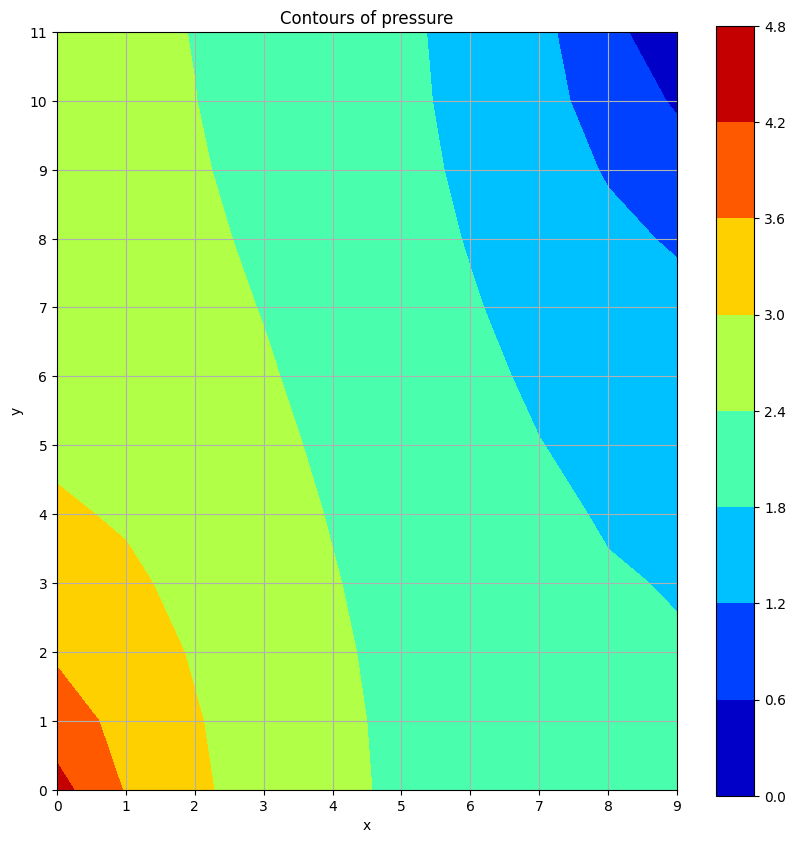

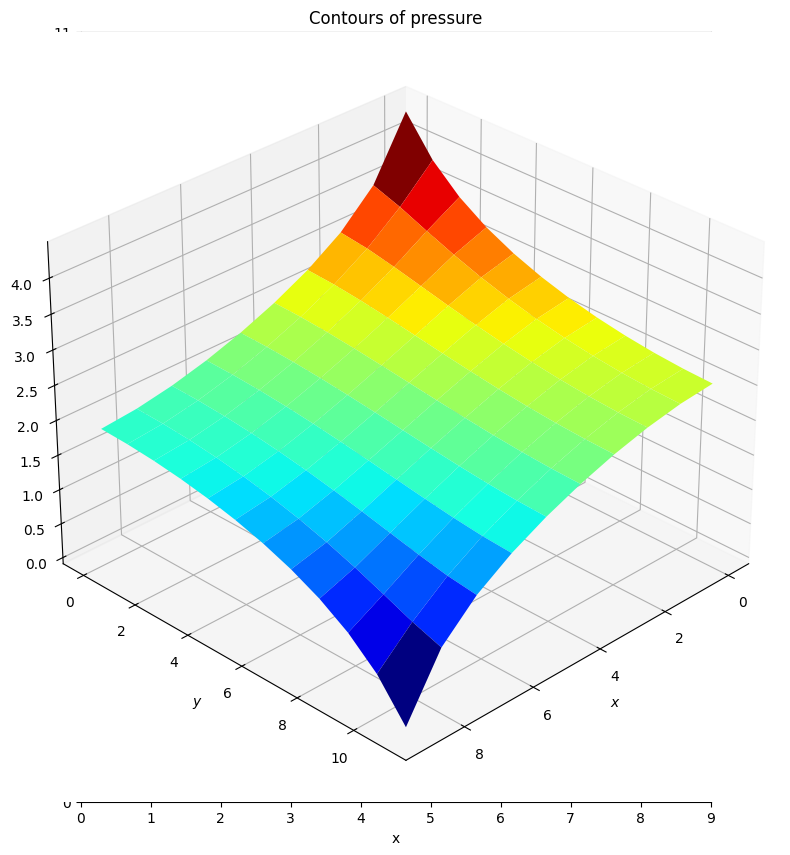

In [23]:
# PLOT NO CANTO SUPERIOR DIREITO (natm = 119)

P = SolveNetwork(conec2, C2, 120, 1, 3, nv2, nc2)
PlotPressure(m,n, P)
PlotPressureAsSurface(10,12, P)

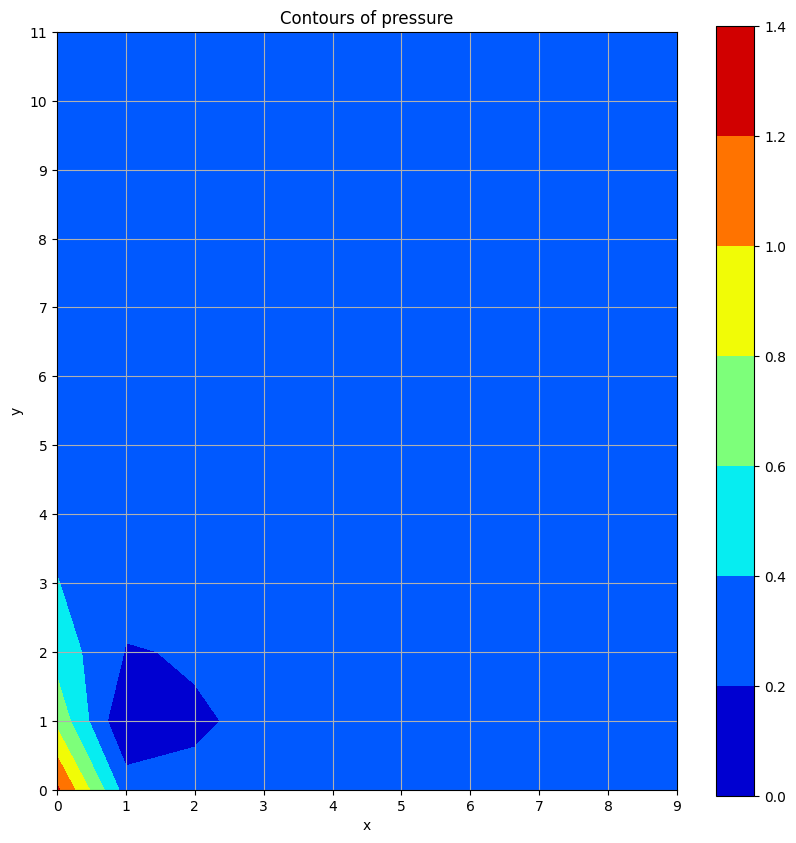

In [24]:
# PLOT NO CANTO INFERIOR DIREITO (natm = n)

P = SolveNetwork(conec2, C2, n, 1, 3, nv2, nc2)
PlotPressure(m,n, P)

COMPARAÇÃO: 
- Ao colocar a pressão no canto superior direito existe uma melhor distribuição dos valores de presão. 
- Ao colocar a pressão num ponto arbitrário esses valores estão mais homogenizados como pressões mais baixas

## Exercício 6

In [25]:
times = []
sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
incog = []
for x in sizes:
    v, c, con, C, coords = GeraRede(x,x,1.3, 3.6)
    t = time.time()
    P = SolveNetwork(con, C, 50, 1, 3, v, c)
    times.append(time.time() - t)
    incog.append(v)

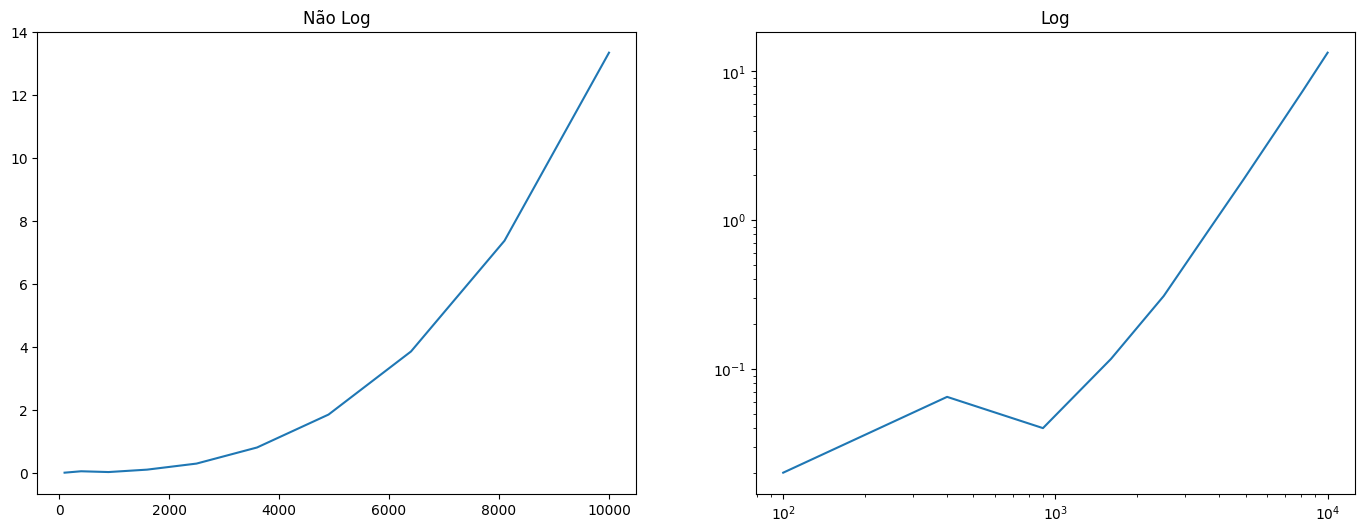

In [26]:
fig, ax = plt.subplots(1,2, figsize=[17,6])

ax[0].plot(incog,times)
ax[0].set_title('Não Log')

ax[1].plot(incog,times)
ax[1].set_title('Log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')